In [1]:
%matplotlib notebook
from ipywidgets import interactive, interact, FloatSlider
import numpy as np
import matplotlib.pyplot as pl

In [2]:
minf = lambda v, m_vh, m_vs: 1 / (1 + np.exp((m_vh - v) / m_vs))
mtau = lambda v, minf, m_vh, m_vs, m_tau_min, m_tau_max, m_tau_delta: \
       m_tau_min + (m_tau_max - m_tau_min) * minf * np.exp(m_tau_delta * (m_vh - v) / m_vs)


In [3]:
v = np.arange(-90, 60)

<IPython.core.display.Javascript object>


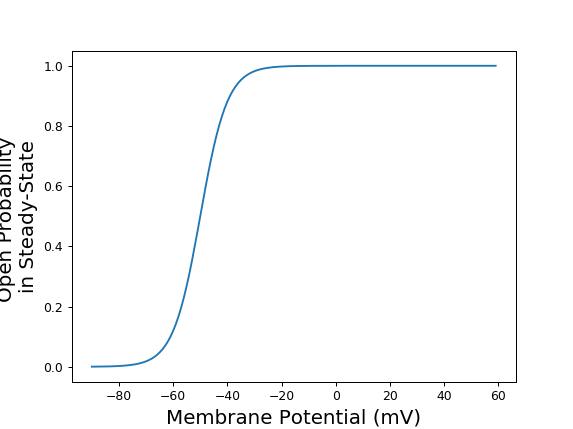

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPS01MC4wLCBkZXNjcmlwdGlvbj11J21fdmgnLCBtYXg9NjAuMCwgbWluPS05MC4wLCBzdGVwPTAuMDAxKSwgRmxvYXRTbGnigKY=


<function __main__.plot_minf>

In [4]:
fig = pl.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(v, minf(v, m_vh=-50, m_vs=5))
pl.xlabel('Membrane Potential (mV)', fontsize=16)
pl.ylabel('Open Probability \nin Steady-State', fontsize=16)
def plot_minf(m_vh, m_vs):
    line.set_ydata(minf(v, m_vh, m_vs))

interact(plot_minf, m_vh=FloatSlider(value=-50, min=-90, max=60, step=0.001),
         m_vs=FloatSlider(value=5, min=0.1, max=10, step=0.001))

<IPython.core.display.Javascript object>


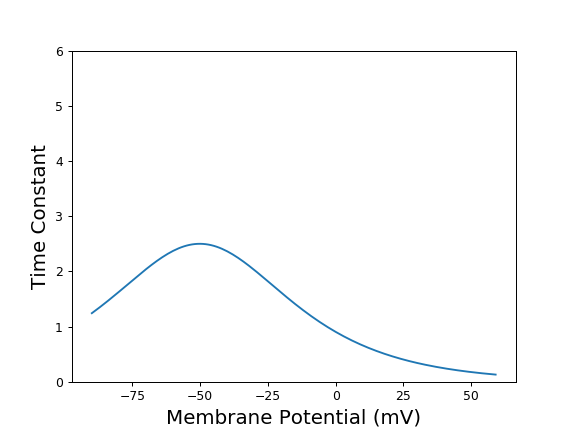

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPS01MC4wLCBkZXNjcmlwdGlvbj11J21fdmgnLCBtYXg9NjAuMCwgbWluPS05MC4wLCBzdGVwPTAuMDAxKSwgRmxvYXRTbGnigKY=


<function __main__.plot_mtau>

In [39]:
fig = pl.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(v, mtau(v, minf(v, m_vh=-50, m_vs=5), m_vh=-50, m_vs=5, m_tau_min=0, m_tau_max=5, m_tau_delta=0))
pl.xlabel('Membrane Potential (mV)', fontsize=16)
pl.ylabel('Time Constant', fontsize=16)
                
def plot_mtau(m_vh, m_vs, m_tau_min, m_tau_max, m_tau_delta):
    line.set_ydata(mtau(v, minf(v, m_vh, m_vs), m_vh, m_vs, m_tau_min, m_tau_max, m_tau_delta))
    ax.set_ylim(0, m_tau_max+1)

interact(plot_mtau, 
         m_vh=FloatSlider(value=-50, min=-90, max=60, step=0.001), 
         m_vs=FloatSlider(value=5, min=0.1, max=15, step=0.001),
         m_tau_min=FloatSlider(value=0, min=0, max=10, step=0.001),
         m_tau_max=FloatSlider(value=5, min=0, max=50, step=0.001),
         m_tau_delta=FloatSlider(value=0, min=0, max=1, step=0.001))

# On voltage step protocol

In [5]:
%matplotlib notebook
from ipywidgets import interactive, interact, FloatSlider
from cell_fitting.test_channels.test_ionchannel import current_subtraction, plot_i_steps_on_ax, voltage_steps
from nrn_wrapper import Cell, load_mechanism_dir
import os
import numpy as np
import matplotlib.pyplot as pl
from neuron import h

In [6]:
save_dir_model = '/home/cf/Phd/programming/projects/cell_fitting/cell_fitting/results/best_models/2'
mechanism_dir = '/home/cf/Phd/programming/projects/cell_fitting/cell_fitting/model/channels/vavoulis'
load_mechanism_dir(mechanism_dir)

In [7]:
# create model cell
cell = Cell.from_modeldir(os.path.join(save_dir_model, 'cell.json'))

In [10]:
v_range = np.arange(-95, 30, 0.1)
pos = 0.5
v_init = -75
onset = 200
dt = 0.01
celsius = 36

# protocol transient na
amps = [-80, -80, -100]
durs = [10, 50, 0]
v_steps = np.arange(-60, 30, 20)
stepamp = 2
sec_channel = getattr(cell.soma(.5), 'nap')

# protocol resurgent na
#amps = [-80, 0, -80]
#durs = [20, 20, 100]
#v_steps = np.arange(-80, 10, 20)
#stepamp = 3
#sec_channel = getattr(cell.soma(.5), 'nat')

<IPython.core.display.Javascript object>


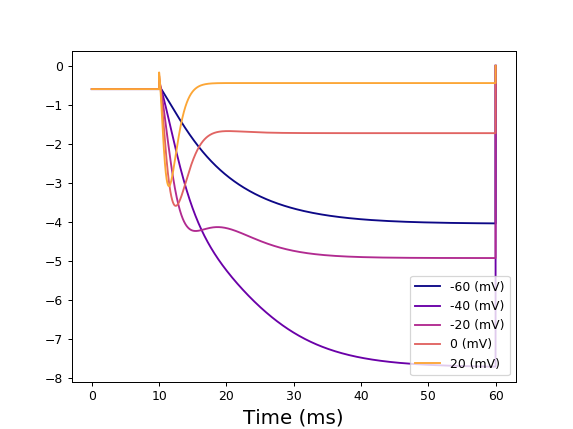

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPS01Mi44MTc2OCwgZGVzY3JpcHRpb249dSdtX3ZoJywgbWF4PTYwLjAsIG1pbj0tOTAuMCwgc3RlcD0wLjAwMSksIEZsb2HigKY=


<function __main__.plot_i_steps>

In [11]:
def plot_i_steps(m_vh, m_vs, m_tau_min, m_tau_max, m_tau_delta, h_vh, h_vs, h_tau_min, h_tau_max, h_tau_delta):
    global vec_m, vec_h, t
    
    sec_channel.m_vh = m_vh
    sec_channel.m_vs = m_vs
    sec_channel.m_tau_min = m_tau_min
    sec_channel.m_tau_max = m_tau_max
    sec_channel.m_tau_delta = m_tau_delta
    
    sec_channel.h_vh = h_vh
    sec_channel.h_vs = h_vs
    sec_channel.h_tau_min = h_tau_min
    sec_channel.h_tau_max = h_tau_max
    sec_channel.h_tau_delta = h_tau_delta
    
    i_steps, t = current_subtraction(cell.soma, sec_channel, celsius, amps, durs, v_steps, stepamp, pos, dt)
    
    ax.clear()
    plot_i_steps_on_ax(ax, i_steps, v_steps, t)
    
    
fig, ax = pl.subplots()
#plot_i_steps(m_vh=sec_channel.m_vh, m_vs=sec_channel.m_vs, 
#             m_tau_min=sec_channel.m_tau_min, m_tau_max=sec_channel.m_tau_max, m_tau_delta=sec_channel.m_tau_delta, 
#             h_vh=sec_channel.h_vh, h_vs=sec_channel.h_vs, 
#             h_tau_min=sec_channel.h_tau_min, h_tau_max=sec_channel.h_tau_max, h_tau_delta=sec_channel.h_tau_delta)
pl.xlabel('Time (ms)', fontsize=16)
pl.ylabel('Current (nA)', fontsize=16)
interact(plot_i_steps, 
         m_vh=FloatSlider(value=sec_channel.m_vh, min=-90, max=60, step=0.001), 
         m_vs=FloatSlider(value=sec_channel.m_vs, min=0.001, max=20, step=0.001),
         m_tau_min=FloatSlider(value=sec_channel.m_tau_min, min=0, max=10, step=0.001),
         m_tau_max=FloatSlider(value=sec_channel.m_tau_max, min=0, max=50, step=0.001),
         m_tau_delta=FloatSlider(value=sec_channel.m_tau_delta, min=0, max=1, step=0.001),
         h_vh=FloatSlider(value=sec_channel.h_vh, min=-90, max=60, step=0.001), 
         h_vs=FloatSlider(value=sec_channel.h_vs, min=-20, max=-0.001, step=0.001),
         h_tau_min=FloatSlider(value=sec_channel.h_tau_min, min=0, max=20, step=0.001),
         h_tau_max=FloatSlider(value=sec_channel.h_tau_max, min=0, max=50, step=0.001),
         h_tau_delta=FloatSlider(value=sec_channel.h_tau_delta, min=0, max=1, step=0.001))

<IPython.core.display.Javascript object>


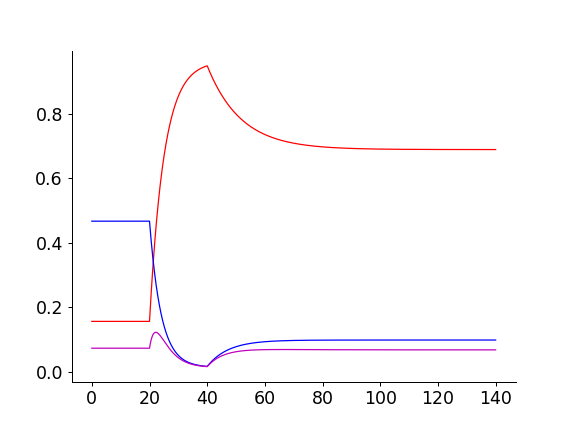

In [82]:
vec_m = h.Vector()
vec_m.record(sec_channel._ref_m)

vec_h = h.Vector()
vec_h.record(sec_channel._ref_h)

vec_i = h.Vector()
vec_i.record(sec_channel._ref_ina)

i_steps_control, t = voltage_steps(cell.soma, amps, durs, [-40], stepamp, pos, dt)

pl.figure()
pl.plot(t, np.array(vec_m)[:-1], color='r')
pl.plot(t, np.array(vec_h)[:-1], color='b')
pl.plot(t, np.array(vec_m)[:-1] * np.array(vec_h)[:-1], color='m')
#pl.plot(t, np.array(vec_i)[:-1] * 0.000157079632679 * 1e6, color='y')
pl.show()

<IPython.core.display.Javascript object>


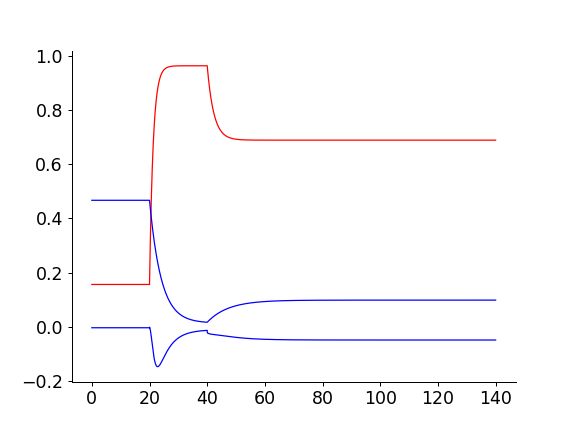

In [74]:
vec_m = h.Vector()
vec_m.record(sec_channel._ref_m)

vec_h = h.Vector()
vec_h.record(sec_channel._ref_h)

vec_i = h.Vector()
vec_i.record(sec_channel._ref_ina)

i_steps_control, t = voltage_steps(cell.soma, amps, durs, [-40], stepamp, pos, dt)

pl.figure()
pl.plot(t, np.array(vec_m)[:-1], color='r')
pl.plot(t, np.array(vec_h)[:-1], color='b')
#pl.plot(t, np.array(vec_i)[:-1], color='b')
pl.show()

In [59]:
from cell_fitting.optimization.helpers import get_channel_list, get_ionlist, get_cellarea
from cell_fitting.util import convert_from_unit

cell_area = get_cellarea(convert_from_unit('u', cell.soma.L), convert_from_unit('u', cell.soma.diam))
print cell_area * 1e2 * 1e2

0.000157079632679
